## Patient Data Overview

This notebook contains all the analysis and obeservation of the patient data that we could find.

In [1]:
%pylab inline
import os
import sqlite3
from itertools import groupby
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

db = sqlite3.connect('../db/sql.db', detect_types=sqlite3.PARSE_DECLTYPES)

Populating the interactive namespace from numpy and matplotlib


### Basic patient information distribution

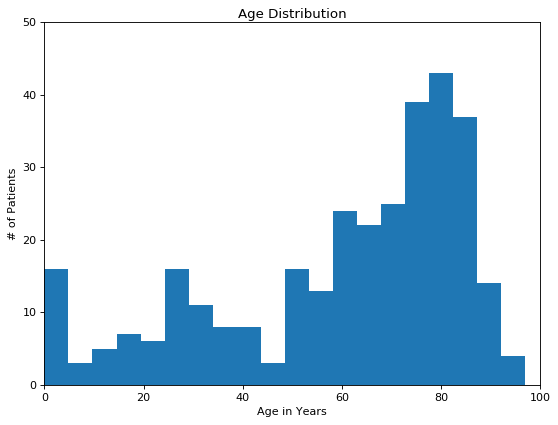

In [2]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag
    FROM records
''')
data = c.fetchall()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
title('Age Distribution')
ylabel('# of Patients')
xlabel('Age in Years')
axis([0, 100, 0, 50])
hist([row[0] for row in data], 20);

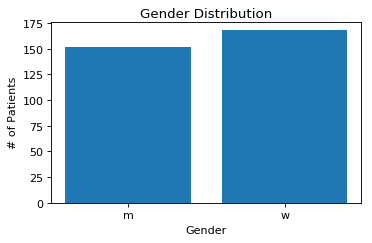

In [3]:
c = db.cursor()
c.execute('''
    SELECT geschlecht, count(geschlecht)
    FROM records
    GROUP BY geschlecht
''')
data = c.fetchall()

figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
bar(range(len(data)), [row[1] for row in data])
ylabel('# of Patients')
xlabel('Gender')
xticks(np.arange(len(data)) + .4, (row[0] for row in data))
title('Gender Distribution');

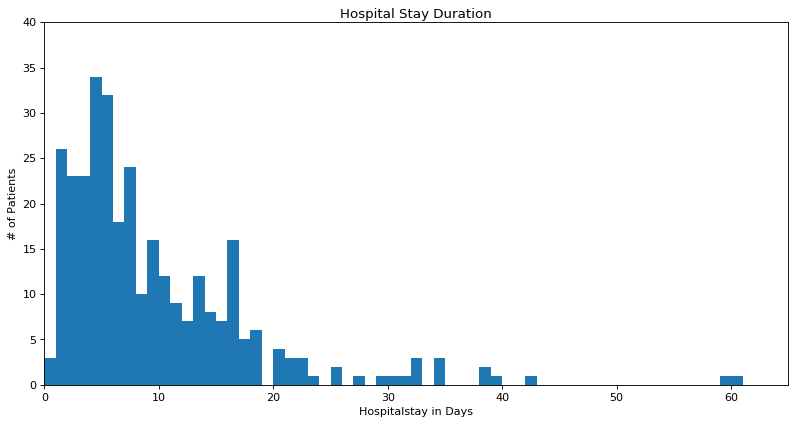

In [4]:
c = db.cursor()
c.execute('''
    SELECT kh_aufenthalt_in_tagen
    FROM records
    ORDER BY kh_aufenthalt_in_tagen
''')
data = c.fetchall()

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
title('Hospital Stay Duration')
ylabel('# of Patients')
xlabel('Hospitalstay in Days')
axis([0, 65, 0, 40])
hist([row[0] for row in data], 61);